In [1]:
import numpy as np 
import pandas as pd 
import os
from nltk.corpus import stopwords
import nltk
from tensorflow.keras.layers import LSTM
nltk.download('punkt')
nltk.download('stopwords')
import re
import spacy
nlp = spacy.load('en_core_web_sm')
for dirname, _, filenames in os.walk('/kaggle/input'):
      for filename in filenames:
            print(os.path.join(dirname, filename))

df = pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv',encoding='latin',header=None,on_bad_lines='skip')
df

2024-03-28 06:06:36.953288: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-28 06:06:36.953411: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-28 06:06:37.144872: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv


,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [2]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
df.rename(columns ={0:'labels',5:'tweets'},inplace='True')

In [4]:
df.drop([1,2,3,4],axis =1,inplace=True)
df.head(5)

,labels,tweets
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [5]:
df['labels']
df['labels']=df['labels'].replace(4,1)
df['labels']


0          0
1          0
2          0
3          0
4          0
          ..
1599995    1
1599996    1
1599997    1
1599998    1
1599999    1
Name: labels, Length: 1600000, dtype: int64

In [6]:
df.isnull().sum()

labels    0
tweets    0
dtype: int64

In [7]:
df=df.sample(frac=1)

In [8]:
df = df.head(10000)
df

,labels,tweets
566994,0,But I so hate my cell phone camera
1104404,1,Is almost done with season 3 of fnl cant wait ...
526648,0,@coollike oh noes your awesome charlie
834474,1,is going spend Sunday with my family
751428,0,at work the day already sucks
...,...,...
1362487,1,@ReneeBarber I'm good - in midst of making din...
390773,0,@InternetKing yo dude i'm really good thanks. ...
2374,0,"Nothing beats the cold, damp feeling you get w..."
684956,0,@juelzdesignz LOL my bad dnt wanna blow ya spo...


In [9]:
df['tweets'].values[0]

'But I so hate my cell phone camera '

In [10]:
stopwords = stopwords.words('english')


In [11]:
from tqdm import tqdm
def get_word_len(tweet):
     return len(tweet.split(' '))
def get_char_len(tweet):
    return len(tweet)
def preprocess_tweet(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"http\S+|www\S+|https\S+",' ',tweet, flags=re.MULTILINE)
    tweet = re.sub(r"@\w+"," ",tweet)
    tweet = re.sub('  ','',tweet)
    tweet = re.sub(r"[^a-zA-Z\s]", "", tweet)  # Remove non-alphabetic characters except spaces
    tokens = [token.lemma_ for token in nlp(tweet)]
    tokens = [token for token in tokens if token not in stopwords and len(token) > 1]
    preprocessed_tweet = ' '.join(tokens)
    return preprocessed_tweet
df['CleanTweet'] = [preprocess_tweet(twt) for twt in df['tweets']]
df['tweet_words_length'] = df['CleanTweet'].apply(get_word_len)
df['tweet_char_length'] = df['CleanTweet'].apply(get_char_len)

In [12]:
df['CleanTweet']

566994                                hate cell phone camera
1104404                almost season fnl wait finish tonight
526648                                oh noe awesome charlie
834474                                go spend sunday family
751428                                 work day already suck
                                 ...                        
1362487    good midst make dinner plan good friend see en...
390773     yo dude really good thank shitty week weather ...
2374       nothing beat cold damp feeling get pull wet pa...
684956               lol bad dnt wanna blow ya spotdammm lol
222041                 lolbit sick meri juti want upload pic
Name: CleanTweet, Length: 10000, dtype: object

In [13]:
df

,labels,tweets,CleanTweet,tweet_words_length,tweet_char_length
566994,0,But I so hate my cell phone camera,hate cell phone camera,4,22
1104404,1,Is almost done with season 3 of fnl cant wait ...,almost season fnl wait finish tonight,6,37
526648,0,@coollike oh noes your awesome charlie,oh noe awesome charlie,4,22
834474,1,is going spend Sunday with my family,go spend sunday family,4,22
751428,0,at work the day already sucks,work day already suck,4,21
...,...,...,...,...,...
1362487,1,@ReneeBarber I'm good - in midst of making din...,good midst make dinner plan good friend see en...,9,50
390773,0,@InternetKing yo dude i'm really good thanks. ...,yo dude really good thank shitty week weather ...,10,56
2374,0,"Nothing beats the cold, damp feeling you get w...",nothing beat cold damp feeling get pull wet pa...,10,54
684956,0,@juelzdesignz LOL my bad dnt wanna blow ya spo...,lol bad dnt wanna blow ya spotdammm lol,8,39


**EDA**

In [14]:
print(len(df[df['labels'] == 1]),len(df[df['labels'] == 0]))

4994 5006


In [15]:
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

In [16]:
import pandas as pd

# Assuming df is your DataFrame containing tweet data and labels
# Create a DataFrame with counts of positive and negative tweets
pos_count = len(df[df['labels'] == 1])
neg_count = len(df[df['labels'] == 0])
data = pd.DataFrame({'labels': ['Positive', 'Negative'], 'count': [pos_count, neg_count]})

# Create the pie chart
fig = px.pie(data, values='count', names='labels', title='Distribution of Positive and Negative tweets',
             hover_name='labels', opacity=0.9, template='simple_white')

# Show the chart
fig.show()

In [17]:
pos_count = len(df[df['labels'] == 1])
neg_count = len(df[df['labels'] == 0])
fig = px.pie([pos_count,neg_count],title ='Distribution of Positive and Negative tweets',names=['Positive','Negative'],hover_name =['Positive','Negative'],opacity=.9,template='simple_white')
fig.show()

**Creating Word Cloud**

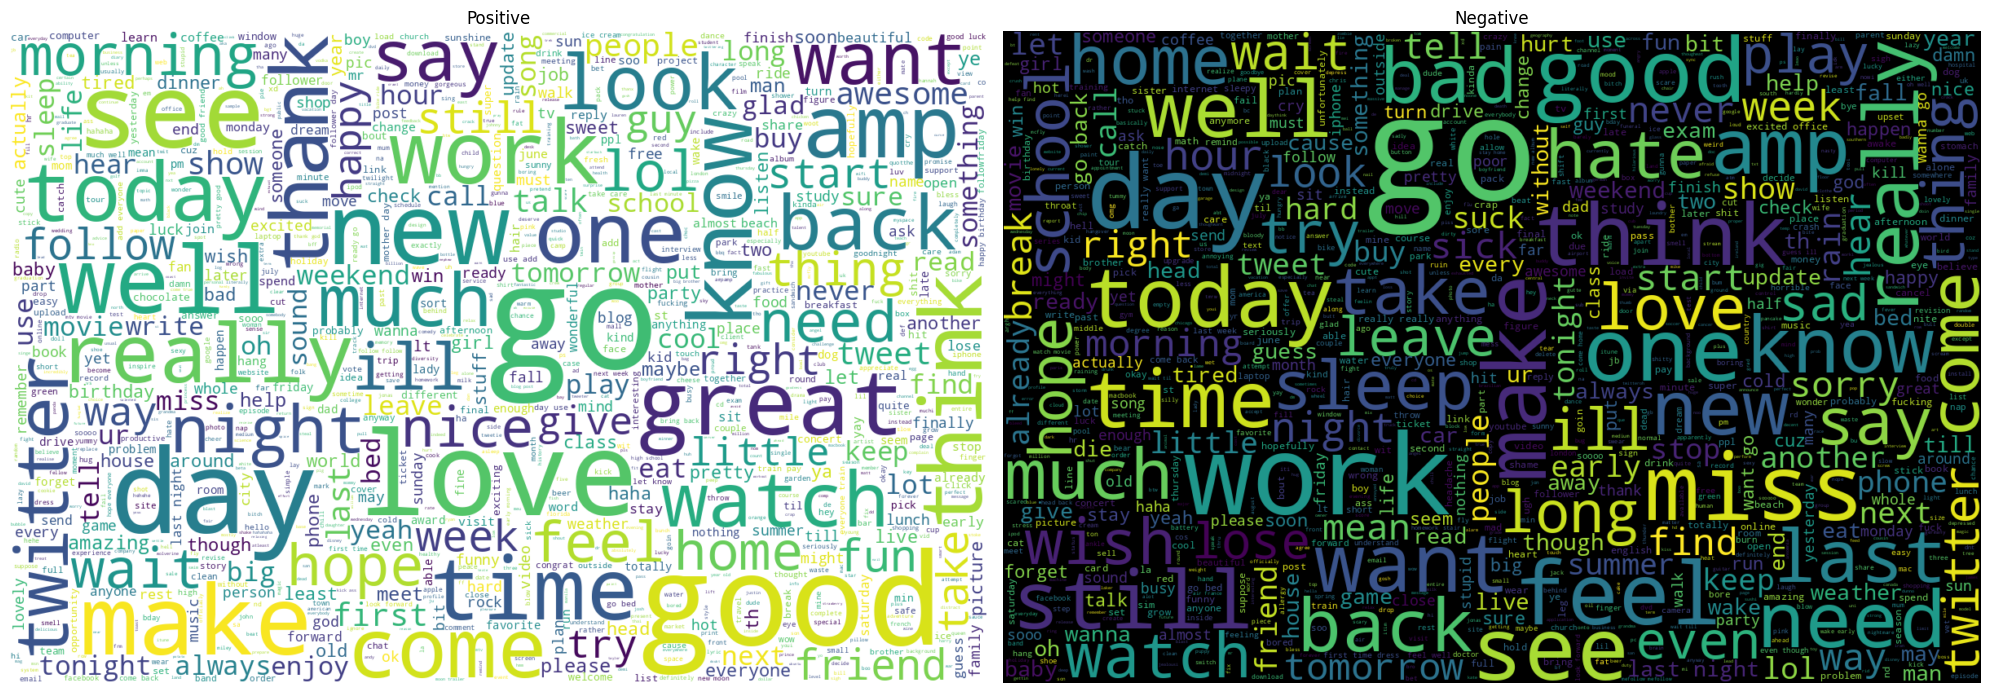

In [18]:
from wordcloud import WordCloud
plt.figure(figsize =(20,8))
plt.subplot(1,2,1)
wordcloud_1 = WordCloud(width = 1200,height = 800,max_words = 1000, contour_width = 2, background_color = 'white',max_font_size =180,colormap='viridis').generate(''.join(df[df['labels']==1]['CleanTweet']))
#wordcloud_1 = WordCloud(width = 1200,height = 800,max_words = 1000, contour_width = 2, background_color = 'white',max_font_size =180,color_map ='virdis').generate(''.join(df[df['labels']==1]['CleanTweet']))
plt.imshow(wordcloud_1,interpolation='bilinear')
plt.axis('off')
plt.title('Positive')

plt.subplot(1,2,2)
wordcloud_2 = WordCloud(width = 1200,height = 800,max_words = 1000, contour_width = 2, background_color = 'black',max_font_size =180,colormap='viridis').generate(''.join(df[df['labels']==0]['CleanTweet']))
#wordcloud_1 = WordCloud(width = 1200,height = 800,max_words = 1000, contour_width = 2, background_color = 'white',max_font_size =180,color_map ='virdis').generate(''.join(df[df['labels']==1]['CleanTweet']))
plt.imshow(wordcloud_2,interpolation='bilinear')
plt.axis('off')
plt.title('Negative')

plt.tight_layout()
plt.show()

**Word_Frequency Distribution**

In [19]:
fig_words = ff.create_distplot([df[df['labels']==1]['tweet_words_length'],df[df['labels']==0]['tweet_words_length']],['Positive','Negative'],bin_size=25,show_hist=False,show_rug=False)
fig_char = ff.create_distplot([df[df['labels']==1]['tweet_char_length'],df[df['labels']==0]['tweet_char_length']],['Positive','Negative'],bin_size=25,show_hist=False,show_rug=False)
fig_words.update_layout(title='Distribution Of Word Count',xaxis_title = 'No. of Words',yaxis_title='Frequency')
fig_char.update_layout(title='Distribution Of character Count',xaxis_title = 'No. of characters',yaxis_title='Frequency')
fig = make_subplots(rows =1,cols=2,subplot_titles =['Word Count','Character Count'])
fig.add_trace(fig_words['data'][0],row = 1,col =1)
fig.add_trace(fig_words['data'][1],row = 1,col =1)
fig.add_trace(fig_char['data'][0],row = 1,col =2)
fig.add_trace(fig_char['data'][1],row = 1,col =2)
fig.update_layout(title_text = 'Distribution plots of word and char count  of the tweets',showlegend = True,font =dict(family='Arial',size =15,color ='black'))
fig.show()

**Splitting DataSet**

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df['CleanTweet'],df['labels'],test_size = 0.2,random_state=42)
x_test,x_val,y_test,y_val = train_test_split(x_test,y_test,test_size=.5)

fig = px.pie(values = [len(x_train),len(x_test),len(x_val)],title = 'Distribution of Training Testing and Validation Tweets'
            ,names = ['Training','Testing','Validation'],hover_name = ['Training','Testing','Validation'],opacity=.9,template = 'simple_white')
fig.show()

**Neural Network**

In [21]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [22]:
x_train.shape

(8000,)

In [23]:
x_test.shape

(1000,)

In [24]:
x_val.shape

(1000,)

In [25]:
vec = CountVectorizer(binary = True)
# CountVectorizer is nothing but one hot encoder if binary = False but it just count

In [26]:
enc_tweets = vec.fit_transform(df['CleanTweet']).toarray()

In [27]:
x_train,x_test,y_train,y_test = train_test_split(enc_tweets,df['labels'],test_size =0.2,random_state=42)
x_test,x_val,y_test,y_val = train_test_split(x_test,y_test,test_size = .5)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [29]:
x_train.shape


(8000, 14637)

In [30]:
model = Sequential()
model.add(Dense(512,activation='relu',input_shape = (enc_tweets.shape[1],)))
model.add(Dropout(.5))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │     7,494,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,564,481 (28.86 MB)

 Trainable params: 7,564,481 (28.86 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
hist_1 = model.fit(x_train,y_train,epochs = 10,batch_size = 32,validation_data =(x_val,y_val))

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - accuracy: 0.6135 - loss: 0.6449 - val_accuracy: 0.6870 - val_loss: 0.6035
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - accuracy: 0.8463 - loss: 0.3726 - val_accuracy: 0.6810 - val_loss: 0.6714
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 51ms/step - accuracy: 0.9351 - loss: 0.1780 - val_accuracy: 0.6650 - val_loss: 0.8494
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.9729 - loss: 0.0755 - val_accuracy: 0.6800 - val_loss: 1.1200
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - accuracy: 0.9863 - loss: 0.0339 - val_accuracy: 0.6930 - val_loss: 1.3059
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - accuracy: 0.9881 - loss: 0.0275 - val_accuracy: 0.6840 - val_loss: 1.3882
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.9922 - loss: 0.0220 - val_accuracy: 0.6930 - val_loss: 1.5466
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.9898 - loss: 0.0212 - 

In [32]:
model.evaluate(x_test,y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6568 - loss: 1.6442


[1.5819666385650635, 0.6779999732971191]

**2.Neural Network | CountVectorizer**

In [33]:
vec = CountVectorizer(binary = False)
enc_tweets = vec.fit_transform(df['CleanTweet']).toarray()
x_train,x_test,y_train,y_test = train_test_split(enc_tweets,df['labels'],test_size =0.2,random_state=42)
x_test,x_val,y_test,y_val = train_test_split(x_test,y_test,test_size = .5)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
model = Sequential()
model.add(Dense(512,activation='relu',input_shape = (enc_tweets.shape[1],)))
model.add(Dropout(.5))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
hist_2 = model.fit(x_train,y_train,epochs = 2,batch_size = 32,validation_data =(x_val,y_val))
model.evaluate(x_test,y_test)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 512)            │     7,494,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,564,481 (28.86 MB)

 Trainable params: 7,564,481 (28.86 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 51ms/step - accuracy: 0.6165 - loss: 0.6481 - val_accuracy: 0.6980 - val_loss: 0.5799
Epoch 2/2
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 51ms/step - accuracy: 0.8385 - loss: 0.3907 - val_accuracy: 0.6860 - val_loss: 0.6425
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6793 - loss: 0.6545


[0.6629051566123962, 0.6710000038146973]

**TfIdf-Vectorizer**

In [34]:
tfidf = TfidfVectorizer()
enc_tweets = tfidf.fit_transform(df['CleanTweet']).toarray()
x_train,x_test,y_train,y_test = train_test_split(enc_tweets,df['labels'],test_size =0.2,random_state=42)
x_test,x_val,y_test,y_val = train_test_split(x_test,y_test,test_size = .5)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
model = Sequential()
model.add(Dense(512,activation='relu',input_shape = (enc_tweets.shape[1],)))
model.add(Dropout(.5))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
hist_2 = model.fit(x_train,y_train,epochs = 2,batch_size = 32,validation_data =(x_val,y_val))
model.evaluate(x_test,y_test)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 512)            │     7,494,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,564,481 (28.86 MB)

 Trainable params: 7,564,481 (28.86 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - accuracy: 0.5946 - loss: 0.6526 - val_accuracy: 0.6980 - val_loss: 0.5740
Epoch 2/2
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - accuracy: 0.8514 - loss: 0.3685 - val_accuracy: 0.6910 - val_loss: 0.6148
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6872 - loss: 0.6018


[0.6215717196464539, 0.6819999814033508]

In [35]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense,Dropout
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['CleanTweet'])
seq_len = 20
word_index = tokenizer.word_index
index_word = tokenizer.index_word

enc_tweets = tokenizer.texts_to_sequences(df['CleanTweet'])
enc_tweets = pad_sequences(enc_tweets,maxlen=seq_len,padding ='post')

In [36]:
enc_tweets[0]
x_train,x_test,y_train,y_test = train_test_split(enc_tweets,df['labels'],test_size =.2,random_state =42)
x_test,x_val,y_test,y_val = train_test_split(x_test,y_test,test_size =.5)
model = Sequential()

model.add(Dense(512,activation ='relu',input_shape =(enc_tweets.shape[1],)))
model.add(Dropout(.5))
model.add(Dense(128,activation ='relu'))
model.add(Dense(32,activation ='relu'))
model.add(Dropout(.5))
model.add(Dense(1,activation ='sigmoid'))

model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics =['accuracy'])
hist_3 = model.fit(x_train,y_train,epochs = 5,batch_size = 10,validation_data = (x_val,y_val))

Epoch 1/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4998 - loss: 35.9992 - val_accuracy: 0.4970 - val_loss: 0.6932
Epoch 2/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5085 - loss: 0.6941 - val_accuracy: 0.5030 - val_loss: 0.6931
Epoch 3/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4958 - loss: 0.7004 - val_accuracy: 0.5030 - val_loss: 0.6931
Epoch 4/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4919 - loss: 0.7008 - val_accuracy: 0.4970 - val_loss: 0.6932
Epoch 5/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4904 - loss: 0.6931 - val_accuracy: 0.4970 - val_loss: 0.6932


**ANN or NeuralNetwork Work well only when it is close to zero and here data value is higher**

**Embedding Layer***To make things go near 0 so we will add one neural layer***Embedding Layer + Neural Network**

In [37]:
from tensorflow.keras.layers import Dense,Dropout,Embedding,Flatten

In [38]:
model = Sequential()

model.add(Embedding(input_dim=len(word_index) + 1, output_dim=50))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_5 = model.fit(x_train, y_train, epochs=2, batch_size=10, validation_data=(x_val, y_val))


Epoch 1/2
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5839 - loss: 0.6646 - val_accuracy: 0.6920 - val_loss: 0.5707
Epoch 2/2
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8638 - loss: 0.3214 - val_accuracy: 0.6530 - val_loss: 0.7332


**Embedding + SimpleRNN **

In [39]:
from tensorflow.keras.layers import SimpleRNN


In [40]:
model = Sequential()


model.add(Embedding(input_dim=len(word_index) + 1, output_dim=50))
model.add(SimpleRNN(units = 100,dropout =.2,return_sequences  = True))
model.add(SimpleRNN(units = 50))
model.add(Dense(32,activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_6 = model.fit(x_train, y_train, epochs=2, batch_size=10, validation_data=(x_val, y_val))


Epoch 1/2
800/800 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.5064 - loss: 0.7075 - val_accuracy: 0.5070 - val_loss: 0.6929
Epoch 2/2
800/800 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.5268 - loss: 0.6964 - val_accuracy: 0.5650 - val_loss: 0.6797


**Embedding + LSTM **

In [41]:
model = Sequential()
model.add(Embedding(input_dim=len(word_index) + 1, output_dim=100))  # Removed input_length
model.add(LSTM(units=100, dropout=0.2, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_7 = model.fit(x_train, y_train, epochs=2, batch_size=10, validation_data=(x_val, y_val))


Epoch 1/2
800/800 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.5134 - loss: 0.6938 - val_accuracy: 0.6170 - val_loss: 0.6701
Epoch 2/2
800/800 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.6352 - loss: 0.6643 - val_accuracy: 0.4970 - val_loss: 0.6939


In [42]:
model.evaluate(x_test, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5050 - loss: 0.6933


[0.6936749219894409, 0.4970000088214874]

**Embedding + GRU **

In [43]:
from tensorflow.keras.layers import GRU

In [44]:
model = Sequential()

model.add(Embedding(input_dim = len(word_index)+1,output_dim = 100))
model.add(GRU(units= 100,dropout = .2,return_sequences = True))
model.add(GRU(units = 50))
model.add(Dense(32,activation = 'relu'))
model.add(Dropout(.5))
model.add(Dense(1,activation ='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_8 = model.fit(x_train, y_train, epochs=8, batch_size=10, validation_data=(x_val, y_val))

Epoch 1/8
800/800 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.5106 - loss: 0.6947 - val_accuracy: 0.4970 - val_loss: 0.6931
Epoch 2/8
800/800 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.5123 - loss: 0.6932 - val_accuracy: 0.5030 - val_loss: 0.6931
Epoch 3/8
800/800 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.4862 - loss: 0.6933 - val_accuracy: 0.4970 - val_loss: 0.6932
Epoch 4/8
800/800 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.5001 - loss: 0.6932 - val_accuracy: 0.5080 - val_loss: 0.6931
Epoch 5/8
800/800 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.5471 - loss: 0.6802 - val_accuracy: 0.6730 - val_loss: 0.6085
Epoch 6/8
800/800 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.8098 - loss: 0.4527 - val_accuracy: 0.6720 - val_loss: 0.6394
Epoch 7/8
800/800 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.8987 - loss: 0.2673 - val_accuracy: 0.6720 - val_loss: 0.8255
Epoch 8/8
800/800 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9428 - loss: 0.1614 - val_accu

In [45]:
model.evaluate(x_test, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6952 - loss: 0.8330


[0.7964938879013062, 0.6980000138282776]